In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [2]:
nz_admin = pd.read_csv('nz_admin_cleaned.csv')

In [3]:
nz_admin.head()

,occupation,Company Name,job_advert_type,Company location (Area),Company location (suburb),Job_Posted(days ago),job_classification,job_subclassification,salary_min,salary_max
0,Administrator,Private Advertiser,promoted,Bay of Plenty,Tauranga,-1,Administration & Office Support,Office Management,47680,66179
1,Receptionist,Avenues Orthodontics,promoted,Bay of Plenty,Tauranga,-1,Administration & Office Support,Receptionists,53124,73001
2,Prosecutions Support Officer,New Zealand Police,standard,Auckland,unknown,4,Administration & Office Support,Other,45684,72316
3,Early Childhood Centre Administrator,Kew Pacific Island Early Learning Centre,standard,Southland,Invercargill,0,Administration & Office Support,Administrative Assistants,45560,58856
4,Business Support Administrator,Private Advertiser,standout,Canterbury,Christchurch,4,Administration & Office Support,Client & Sales Administration,55473,66525


In [4]:
nz_admin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708 entries, 0 to 2707
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   occupation                 2708 non-null   object
 1   Company Name               2708 non-null   object
 2   job_advert_type            2708 non-null   object
 3   Company location (Area)    2708 non-null   object
 4   Company location (suburb)  2708 non-null   object
 5   Job_Posted(days ago)       2708 non-null   int64 
 6   job_classification         2708 non-null   object
 7   job_subclassification      2708 non-null   object
 8   salary_min                 2708 non-null   int64 
 9   salary_max                 2708 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 211.7+ KB


## Occupation - Top 10 popular occupations in adminstration field

In [179]:
nz_admin['occupation'].value_counts().sort_values()

Immigration Adviser                                                  1
Billing Administrator                                                1
Administrator- Architectural building products                       1
Administrator - Executive Office                                     1
Risk and Assurance Administrator                                     1
                                                                  ... 
Temp Receptionists/Administrators - Ad Agencies/Music Companies     71
Contracts Administrator                                             76
Team Administrator                                                  76
Temporary Office Roles                                             280
Executive Assistant                                                301
Name: occupation, Length: 548, dtype: int64

In [70]:
nz_admin['occupation'].value_counts().keys().tolist()[:10]

['Executive Assistant',
 'Temporary Office Roles',
 'Team Administrator',
 'Contracts Administrator',
 'Temp Receptionists/Administrators - Ad Agencies/Music Companies',
 'Category Manager',
 'Business Professional - Temporary Opportunities',
 'Customer Service and Sales Support',
 'Seeking Executive Support Candidates',
 'On-site Manager']

### Seaborn - Bar Chart

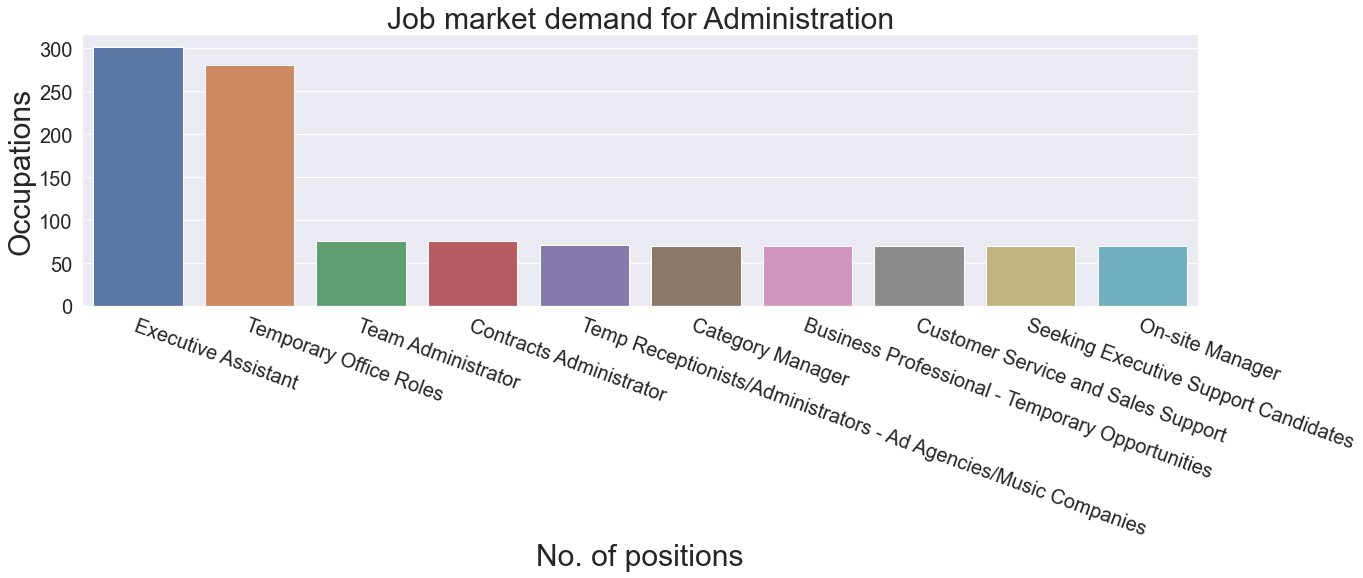

In [189]:
fig_sns_bar = plt.figure(figsize = (20, 5))
plt_sns = sns.barplot(x=nz_admin['occupation'].value_counts().index[:10,], 
            y=nz_admin['occupation'].value_counts()[:10,]
           )

plt_sns.set_title("Job market demand for Administration", size=30)
plt_sns.set_xlabel("No. of positions", size=30)
plt_sns.set_ylabel("Occupations", size=30)

for xlabel in plt_sns.get_xticklabels():
    xlabel.set_rotation_mode("anchor")
    xlabel.set_ha("left")
    xlabel.set_rotation(-20)
    xlabel.set_size(20)

for ylabel in plt_sns.get_yticklabels():
    ylabel.set_size(20)

### Matplotlib - Bar Chart

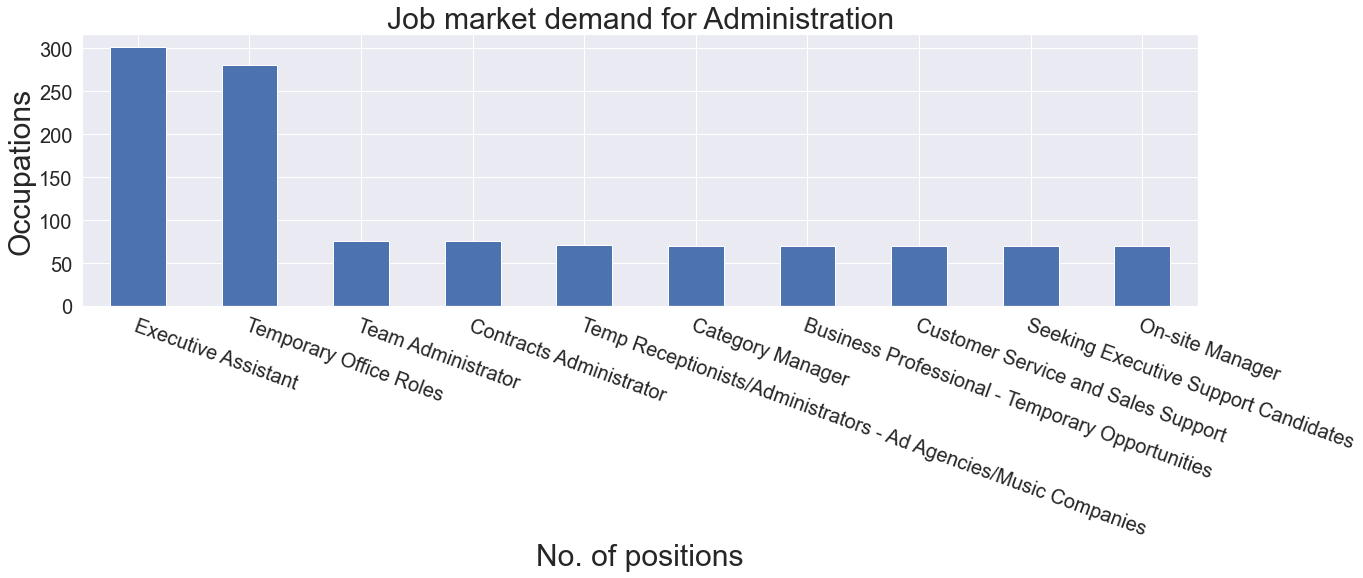

In [186]:
fig_plt_bar = plt.figure(figsize = (20, 5))
# sns.set()

nz_admin['occupation'].value_counts()[:10,].plot(kind='bar')
plt.ylabel("Occupations", size=30)
plt.xlabel("No. of positions", size=30)
plt.title("Job market demand for Administration", size=30)

ax = plt.gca()
for xlabel in ax.get_xticklabels():
    xlabel.set_rotation_mode("anchor")
    xlabel.set_ha("left")
    xlabel.set_rotation(-20)
    xlabel.set_size(20)

for ylabel in ax.get_yticklabels():
    ylabel.set_size(20)

# plt.tight_layout()
plt.show()

### Plotly - Bar Chart

In [212]:
fig_px_bar = px.bar(nz_admin['occupation'].value_counts()[:10,],
                    title="Job market demand for Administration",
                    labels={
                        'value': 'No. of positions'
                    }
                   )
fig_px_bar.update_layout(
    title={  
#         "text":"Job market demand for Administration",
        "y":0.96,  # y轴数值
        "x":0.5,  # x轴数值
        "xanchor":"center",  # x、y轴相对位置
        "yanchor":"top"  
    }
)
fig_px_bar.show()

## Company - Top 10 hiring enterprises

In [195]:
nz_admin['Company Name'].value_counts()[:10]

Beyond Recruitment - Winner – Best Innovation –2018 Global Recruiter Awards    285
Asset Recruitment Ltd                                                          282
GBL Personnel                                                                  218
Alpha Recruitment - NZ                                                          76
Adecco Office                                                                   74
Recruitment Studio                                                              73
Enterprise Recruitment                                                          73
Robert Walters                                                                  73
one eighty recruitment                                                          72
Graham Consulting                                                               72
Name: Company Name, dtype: int64

### Plotly - Donut Chart

In [358]:
fig_px_donut = px.pie(values=nz_admin['Company Name'].value_counts()[:10], 
                    names=nz_admin['Company Name'].value_counts().index[:10], 
                    title="Top 10 hiring enterprises",
                    hole=0.5
                   )
fig_px_donut.update_layout(
    title={  
#         "text":"Top 10 hiring enterprises",
        "y":0.96,  # y轴数值
        "x":0.5,  # x轴数值
        "xanchor":"center",  # x、y轴相对位置
        "yanchor":"middle"  
    },
    legend={
        "xanchor": "center",
        "yanchor": "bottom",
        "y": -2,
        "x": 0.5
    }
)
fig_px_donut.update_traces(
    textposition='outside',
    textinfo='percent+value'
)
fig_px_donut.show()

## Job promotion type

In [349]:
nz_admin['job_advert_type'].value_counts()

standout    1877
standard     811
promoted      20
Name: job_advert_type, dtype: int64

### Plotly - Pie Chart

In [359]:
fig_px_pie = px.pie(values=nz_admin['job_advert_type'].value_counts(),
                    names=nz_admin['job_advert_type'].value_counts().index,
                    title="Job promotion type",
                   )
fig_px_pie.update_layout(
    title={  
        "y":0.96,  # y轴数值
        "x":0.5,  # x轴数值
        "xanchor":"center",  # x、y轴相对位置
        "yanchor":"top"  
    }
)
fig_px_pie.update_traces(
#     textposition='outside',
    textinfo='percent+value+label'
)
fig_px_pie.show()

## Company Location

In [365]:
nz_admin['Company location (Area)'].value_counts()

Auckland                                 890
Wellington                               854
Waikato                                  404
Canterbury                               203
Bay of Plenty                             93
Manawatu                                  92
Northland                                 78
Otago                                     40
Hawkes Bay                                19
Taranaki                                  10
Tasman                                     8
Southland                                  7
Marlborough                                4
Gisborne                                   4
West Coast                                 1
AucklandAuckland,$21 - $22 p.h. + 8%       1
Name: Company location (Area), dtype: int64